### Install Packages and Import Dataset

In this notebook, we’ll be working with the **Obsesity  Estimation** dataset. This dataset is will be used in machine learning tasks related to classification, and  contains attributes related to individual eating habits and physical conditions that most significant to predict obesity levels, as categorized by the NObesity classification system.

Each row in the dataset represents one individual eating habits and physical condition and nutritional behavior. The dataset has the following columns:
- **Gender** - Male or Female
- **Age**:  A person's age may affect their metabolic rate and lifestyle, influencing obesity levels.
- **Height**: Useful for calculating Body Mass Index (BMI), which is closely related to obesity.
- **Weight**: One of the most critical variables for determining obesity.
- **Family_History_with_Overweight**: Whether a person has a genetic predisposition to being overweight or obese, which can significantly impact obesity risk.
- **FAVC** (Frequent Consumption of High-Calorie Food): This reflects dietary habits, particularly the consumption of high-calorie foods, which is a known risk factor for obesity.
- **FCVC** (Frequency of Consumption of Vegetables): A higher intake of vegetables is typically associated with a healthier diet and lower risk of obesity.
- **NCP** (Number of Meals): The number of meals consumed daily can impact weight gain, especially if portion sizes are not controlled.
- **CAEC** (Consumption of Food Between Meals): Eating snacks or meals outside of regular eating hours can contribute to weight gain.
- **SMOKE** (Smoking Habit): Smoking status can influence metabolism and overall health, affecting obesity.
- **CH20** (Water Intake: Adequate water intake can aid in digestion and prevent overeating, indirectly influencing weight management.
- **CALC** (Calories Consumed): Regular or frequent alcohol consumption adds extra calories, contributing to weight gain.
- **FAF** (Physical Activity Frequency): Frequency of physical activity is a key factor in energy expenditure and weight control.
- **TUE** (Time Spent Using Technology): Time spent on technology or screens is often linked to sedentary behavior, which can contribute to obesity.
- **MTRANS** (Transportation Mode): The mode of transportation, such as walking or using public transportation, reflects levels of physical activity in daily life.

The target column is **NObeyesdad** - Obesity level, which we will try to predict based on the other features in the dataset.

*Attributes related with eating habits are:*

    - Frequent consumption of high caloric food (FAVC),

    - Frequency of consumption of vegetables (FCVC),

    - Number of main meals (NCP),

    - Consumption of food between meals (CAEC),

    - Consumption of water daily (CH20),

    - Consumption of alcohol (CALC).


*Attributes related with the physical condition are:*

    - Calories consumption monitoring (SCC),

    - Physical activity frequency (FAF),

    - Time using technology devices (TUE),

    - Transportation used (MTRANS),

*Other variables were:*

    - Gender

    - Age

    - Height

    - Weight

This dataset was obtained from the UCI Machine Learning Repository, a well-known resource for datasets in the machine learning community.

In [72]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [73]:
obesity = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [74]:
row , col = obesity.shape
print("Total records in dataset : ", row)
print("Total number of col in dataset : ", col)
obesity.info()

Total records in dataset :  2111
Total number of col in dataset :  17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                      

In [75]:
obesity.isnull().sum() # check for null values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [76]:
# checking for null vaues
zero_counts = (obesity == 0).sum()

# Display the counts
print("Count of 0s in each column:")
print(zero_counts)

Count of 0s in each column:
Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                               411
TUE                               557
CALC                                0
MTRANS                              0
NObeyesdad                          0
dtype: int64


In [77]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [78]:
# Get unique values for all columns
unique_values_per_column = {col: obesity[col].unique() for col in obesity.columns}
# Display unique values for each column
for col, unique_vals in unique_values_per_column.items():
    print(f"Unique values in '{col}': {unique_vals}")



Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Age': [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Unique values in 'Height': [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Unique values in 'Weight': [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['no' 'yes']
Unique values in 'FCVC': [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606

There are no duplicate or missing values ​​in the data.

**Age** column is not holding whole numbers but also contains float value till 6 decimal

**weight** column is in kg or lbs?

**FCVC** - FCVC appears to be a scale related to the level or frequency of consumption of Vegetables by individuals. The range of values from 1 to 3 may indicate different levels of consumption frequency.

**NCP** - NCP appears to be a scale related to the number of main meals the person is consuming in a day.

**CH2O** - is a measure or scale likely related to water consumption. Values from 1 to 3 may represent different levels or frequencies of water consumption.

**FAF** - is a measure or scale related to physical activity. The values are likely to reflect the number of hours spent in physical activity per day or during a given period of time.

**TUE** - an indicator or scale related to time spent in front of television (Television Viewing Time). The values may indicate the number of hours spent watching television per day or during a specific period of time.

**MTRANS**:  Has values['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']- is a variable describing the preferred mode of transport used by respondents.

**CALC** : has values ['no' 'Sometimes' 'Frequently' 'Always'] - a categorical variable that describethe frequency of consumption of alcohol.

**SCC**: has values ['no' 'yes'] - is a binary variable that indicates whether the person is monitoring the calorie consumption.

**SMOKE**: has va;ues['no' 'yes']

**CAEC**: Has values ['Sometimes' 'Frequently' 'Always' 'no'] - CAEC column is likely a categorical variable that describes the frequency of consuming food or supplements between meals.

**family_history_with_overweight**: Has values['yes' 'no'] Based on the data provided, the family_history_with_overweight column is a binary variable that indicates the presence or absence of a family history of obesity in the respondent.

**FAVC** : has values ['no' 'yes']- based on data provided this column is a binary variable that indicates whether a person frequently consumes high-calorie foods (yes) or not (no).

**Gender** : has values ['Male', 'Female']


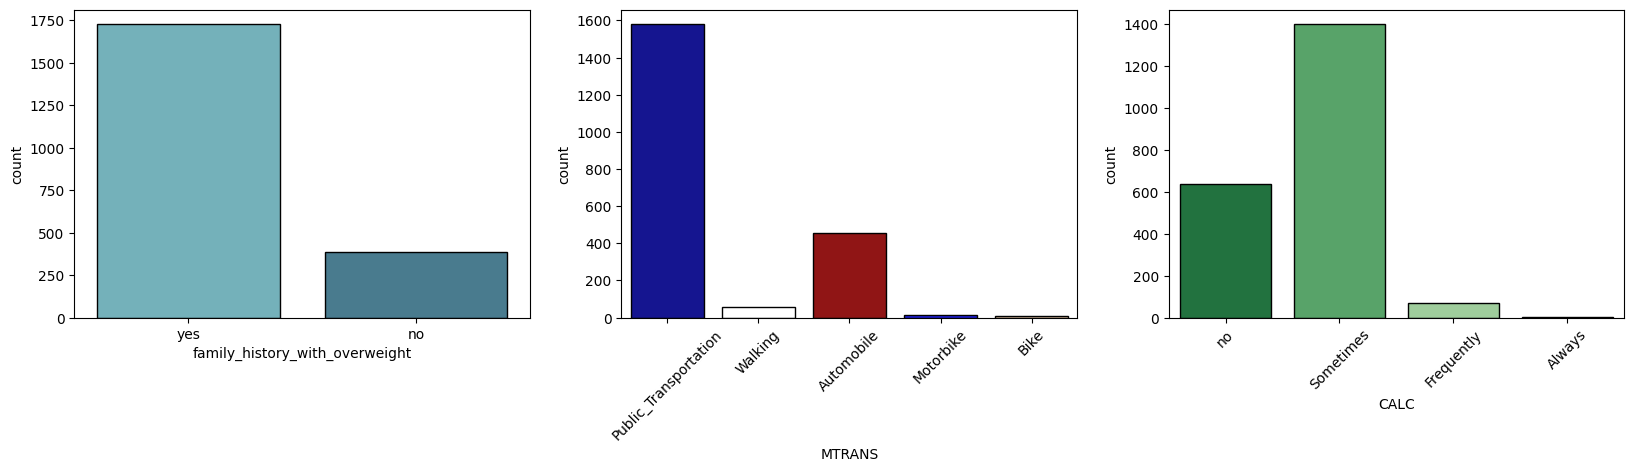

In [79]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = obesity, palette="GnBu_d", 
              hue='family_history_with_overweight', edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = obesity, palette="flag",hue='MTRANS',edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = obesity, palette="Greens_r",hue='CALC',edgecolor="black")
plt.xticks(rotation=45)
plt.show()

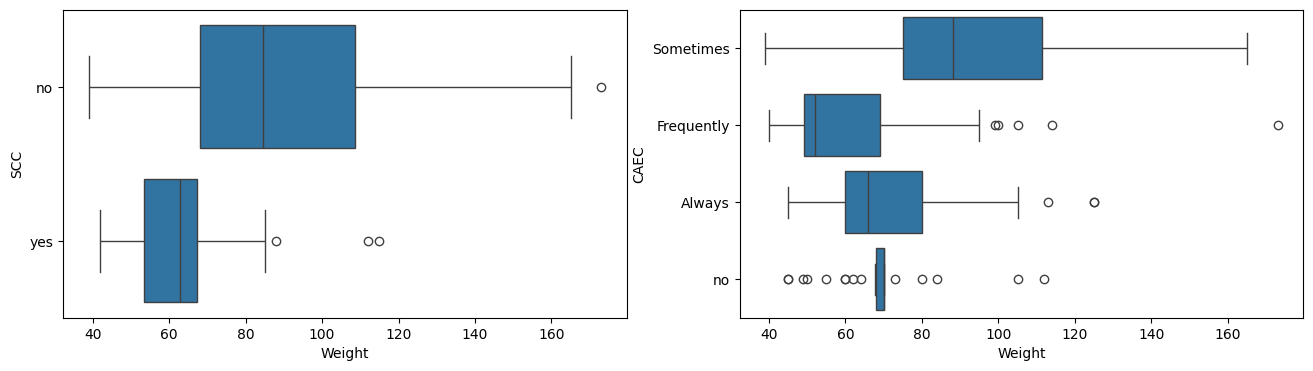

In [80]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = obesity)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = obesity)
plt.show()

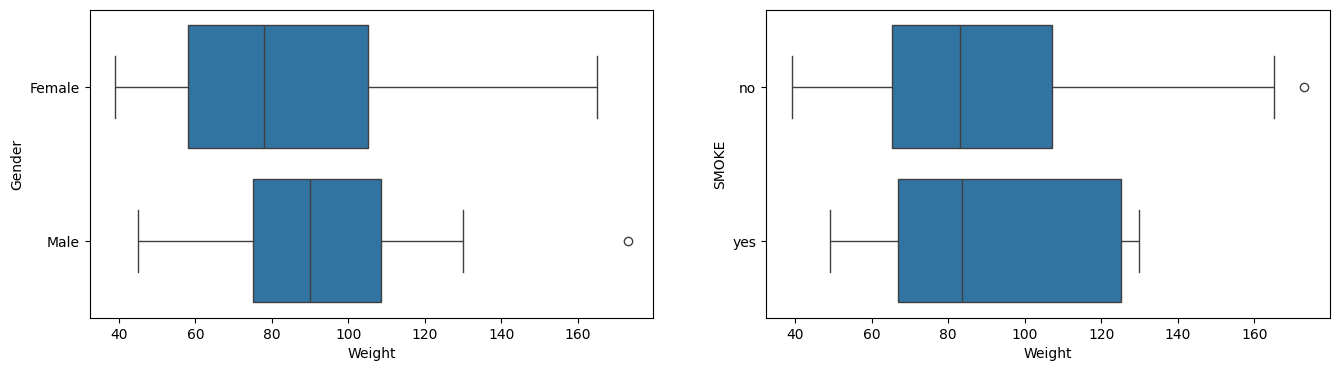

In [81]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'Gender', data = obesity)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'SMOKE', data = obesity)
plt.show()

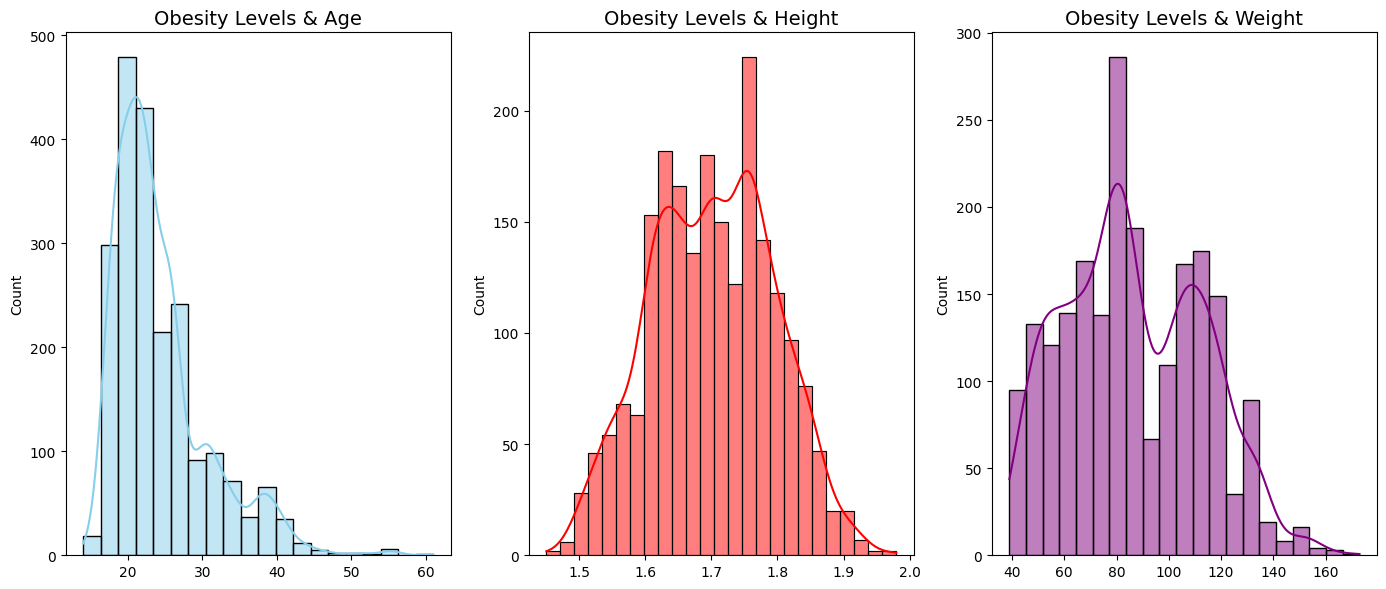

In [82]:
# Distribution of different type of amount
plt.figure(figsize=(14, 6))
Age = obesity.Age.values
Height= obesity.Height.values
Weight = obesity.Weight.values

plt.subplot(1, 3, 1)
sns.histplot(Age, kde=True, bins=20, color='skyblue').set_title('Obesity Levels & Age' , fontsize = 14)
plt.subplot(1, 3, 2)
sns.histplot(Height,kde=True,color = 'red').set_title('Obesity Levels & Height' , fontsize = 14)
plt.subplot(1,3,3)
sns.histplot(Weight , kde=True,color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.tight_layout()
plt.show()

In [83]:

def show_pie_chart(df, column_name):
    
    # Converting string values to categorical
    df[column_name] = df[column_name].astype('category')
    
    # Calculating the frequency of values in the column
    counts = df[column_name].value_counts()

    
    # Sorting the values in the column by their frequency in descending order
    counts_sorted = counts.sort_values(ascending=False)
    
    # subplot
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    plt.subplots_adjust(wspace = 0.5)
    
   
    axes[0].pie(counts.values, labels=counts_sorted.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    
    
    sns.countplot(data=df, y=column_name, ax=axes[1], order=counts_sorted.index, palette="pastel", hue=True, legend=False)
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    
    for i, v in enumerate(counts_sorted.values):
        axes[1].text(v + 0.1, i, str(v), ha='left', va = 'center', color = 'black', fontweight = 'bold')
    
    plt.show()

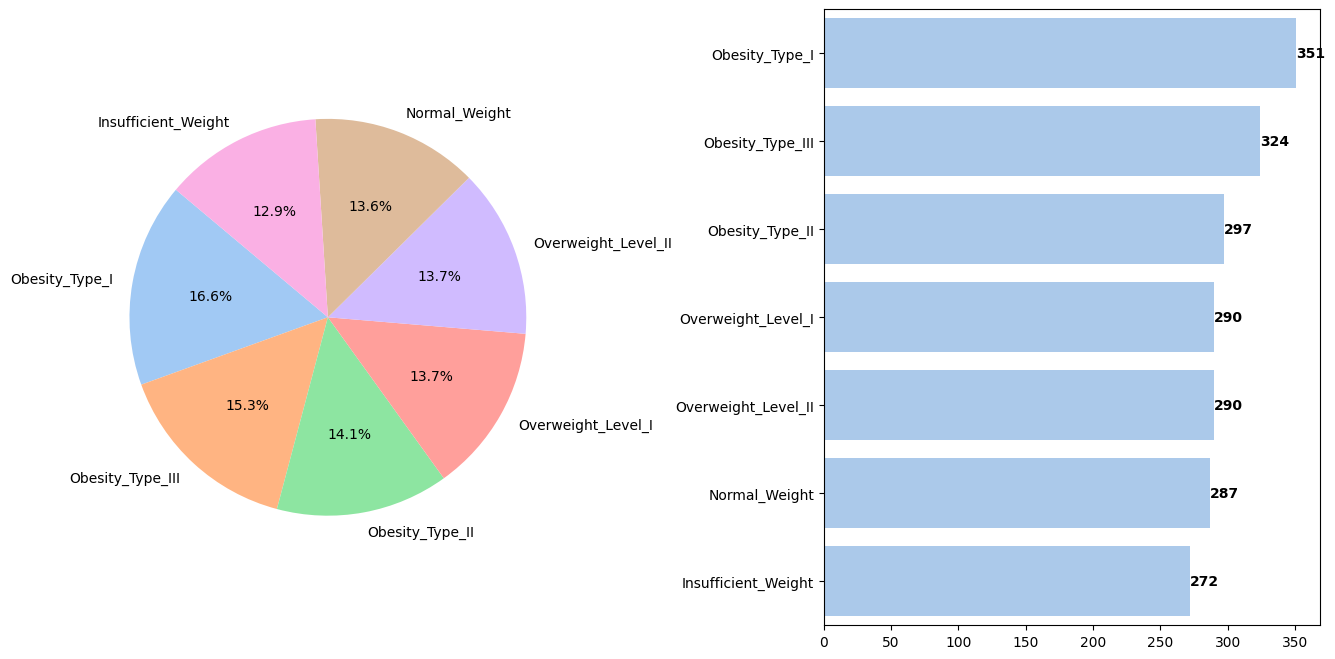

In [84]:
show_pie_chart(obesity, 'NObeyesdad')

We can see Obesity type I has highest percentage - 16.6 %

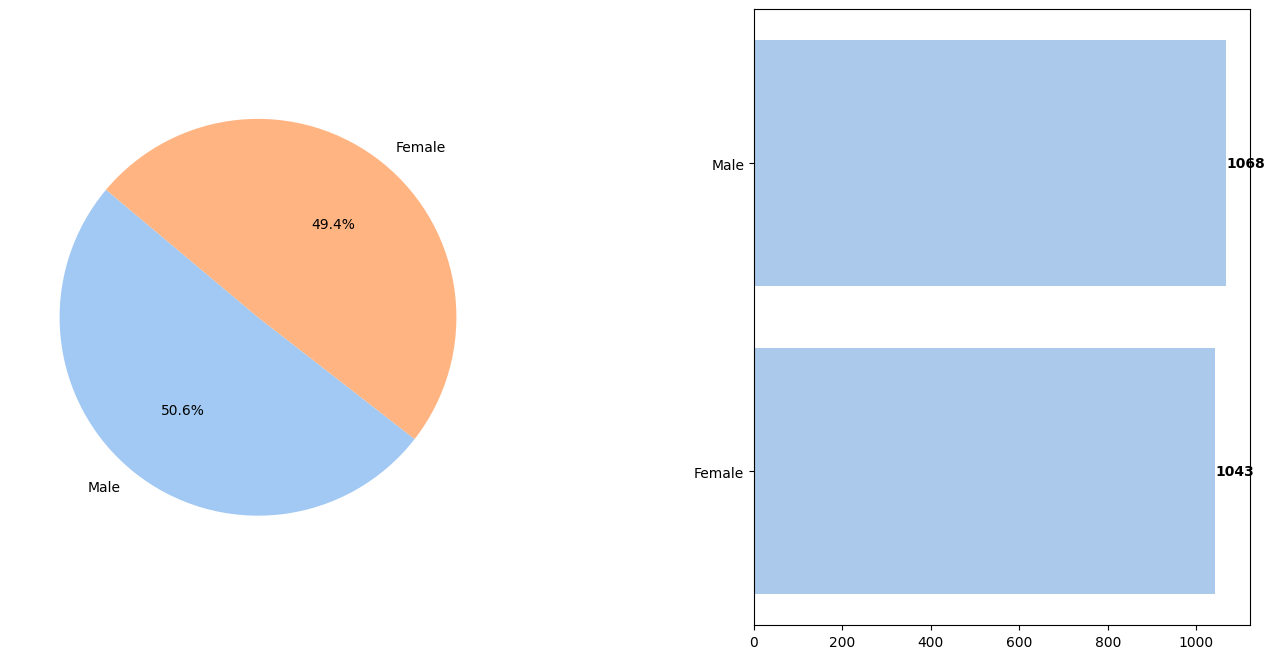

In [85]:
show_pie_chart(obesity, column_name='Gender')

Here we observe the Gender distribution is fairly distrubuted

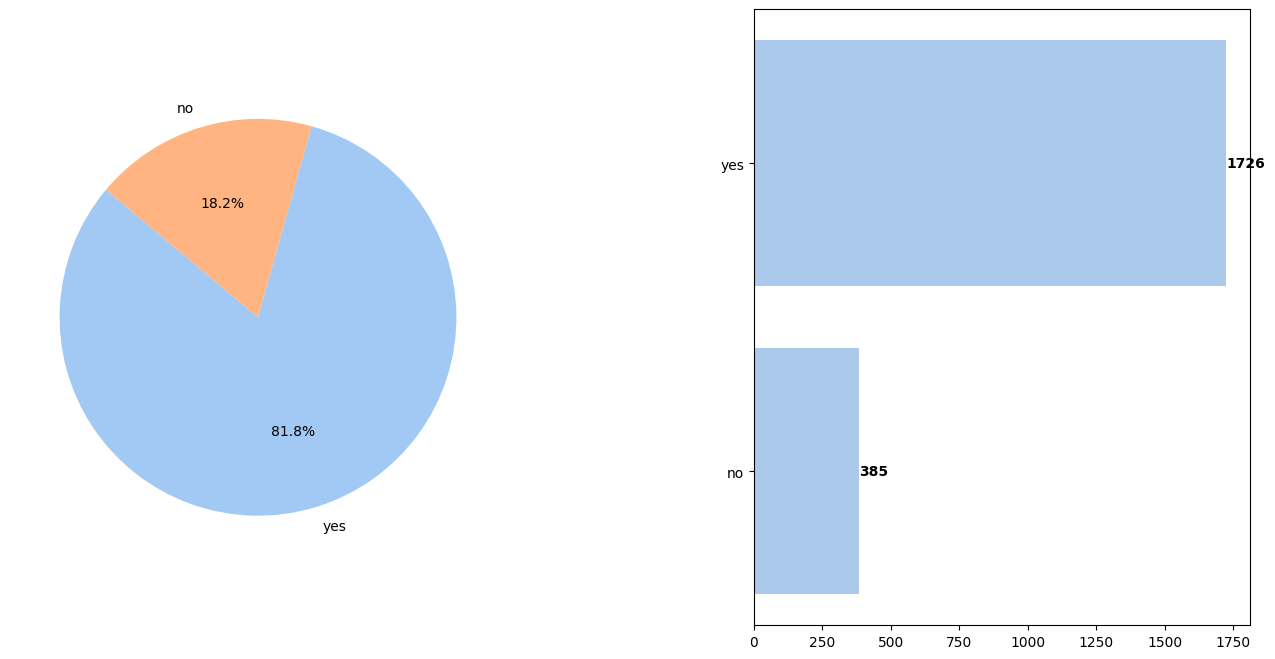

In [86]:
show_pie_chart(obesity, column_name='family_history_with_overweight')

Here we observe 81.8% have family history of obsesity

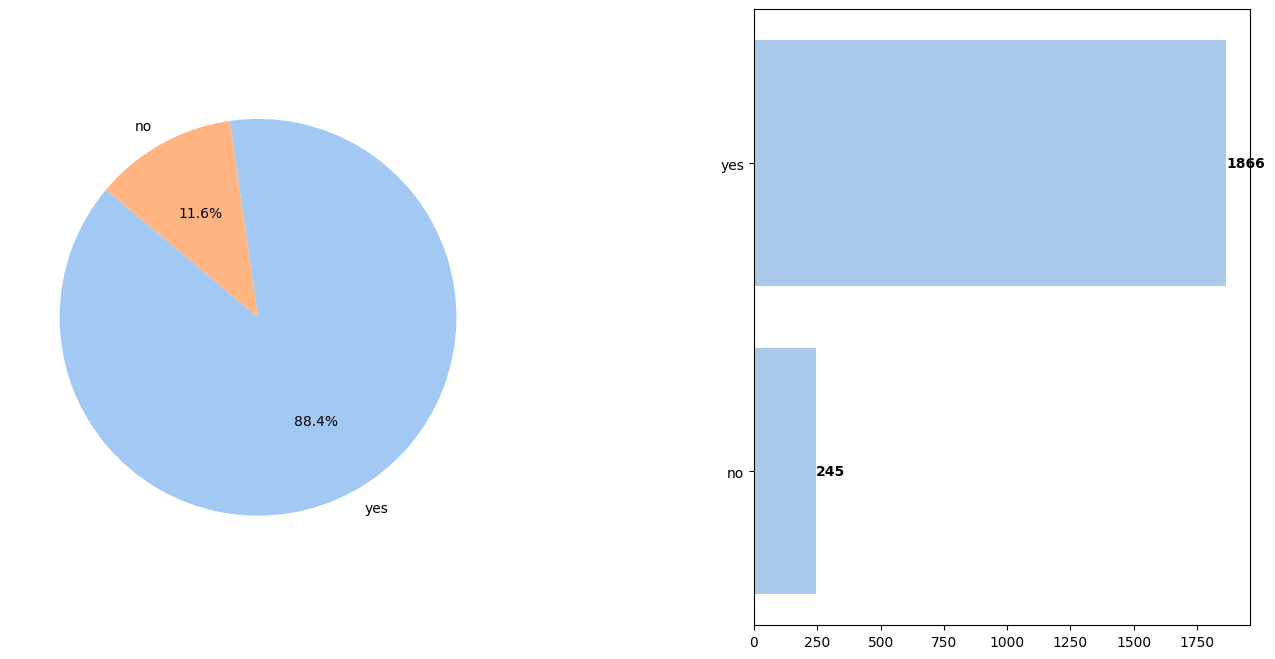

In [87]:
show_pie_chart(obesity, column_name='FAVC')

Here we observe 88.4% people Frequently consume high caloric food

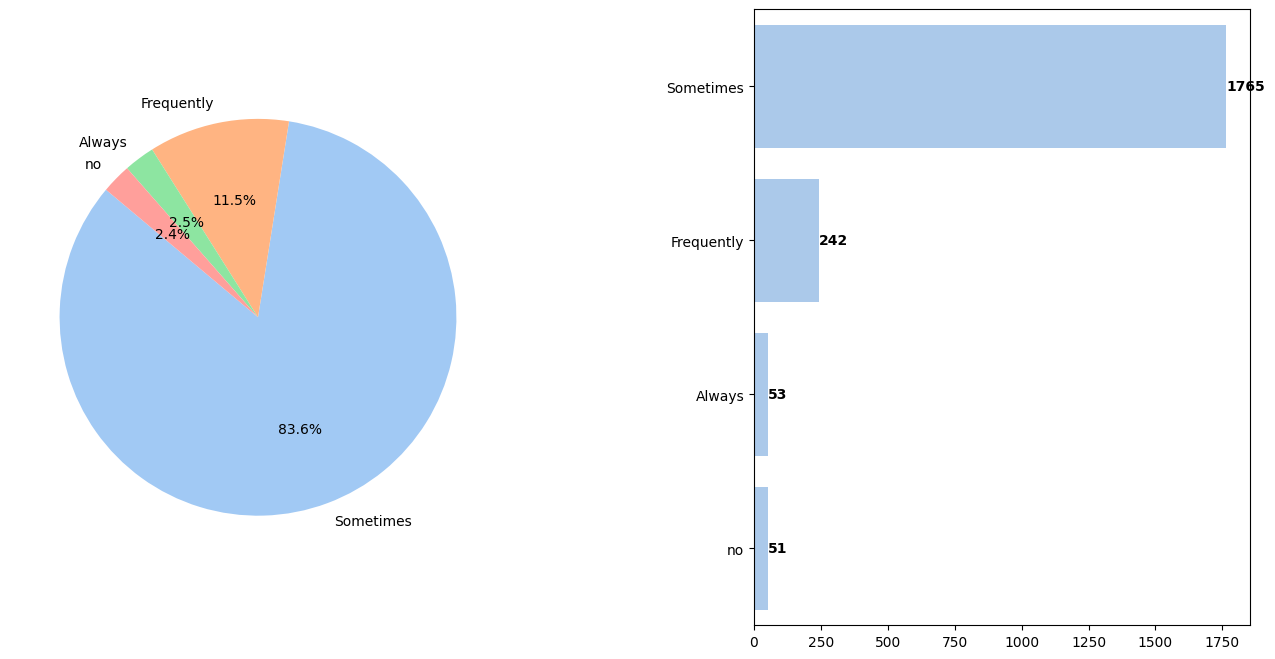

In [88]:
show_pie_chart(obesity, column_name='CAEC')

Here we observe 2.4 % people say they don't consume food between meals and 2.5 % say they always consume food between meals

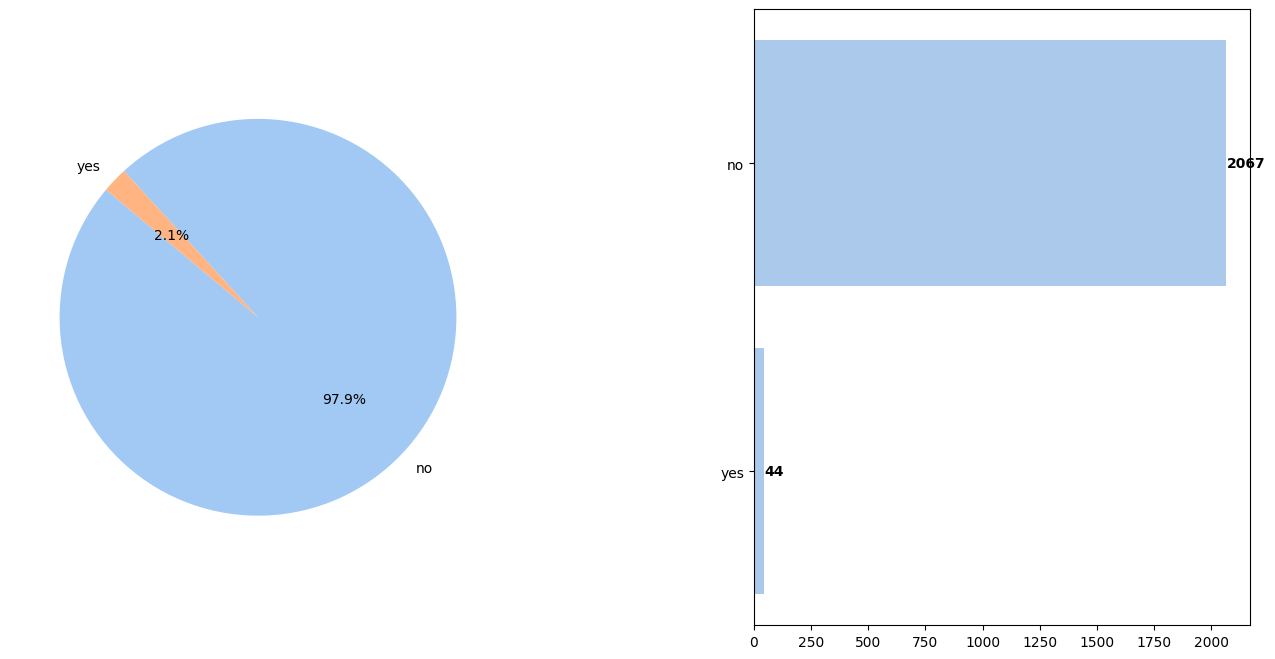

In [90]:
show_pie_chart(obesity, 'SMOKE')

97.9 % people said they are non smokers

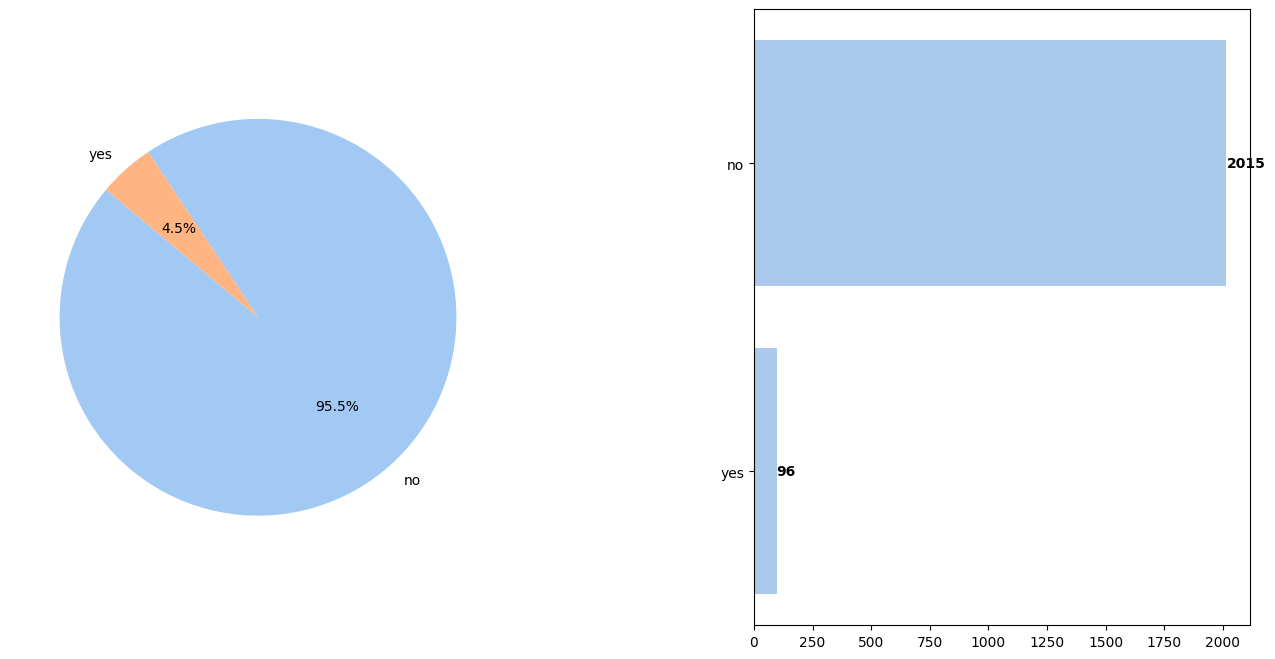

In [91]:
show_pie_chart(obesity, 'SCC')

95.5% don't watch calorie consumption.

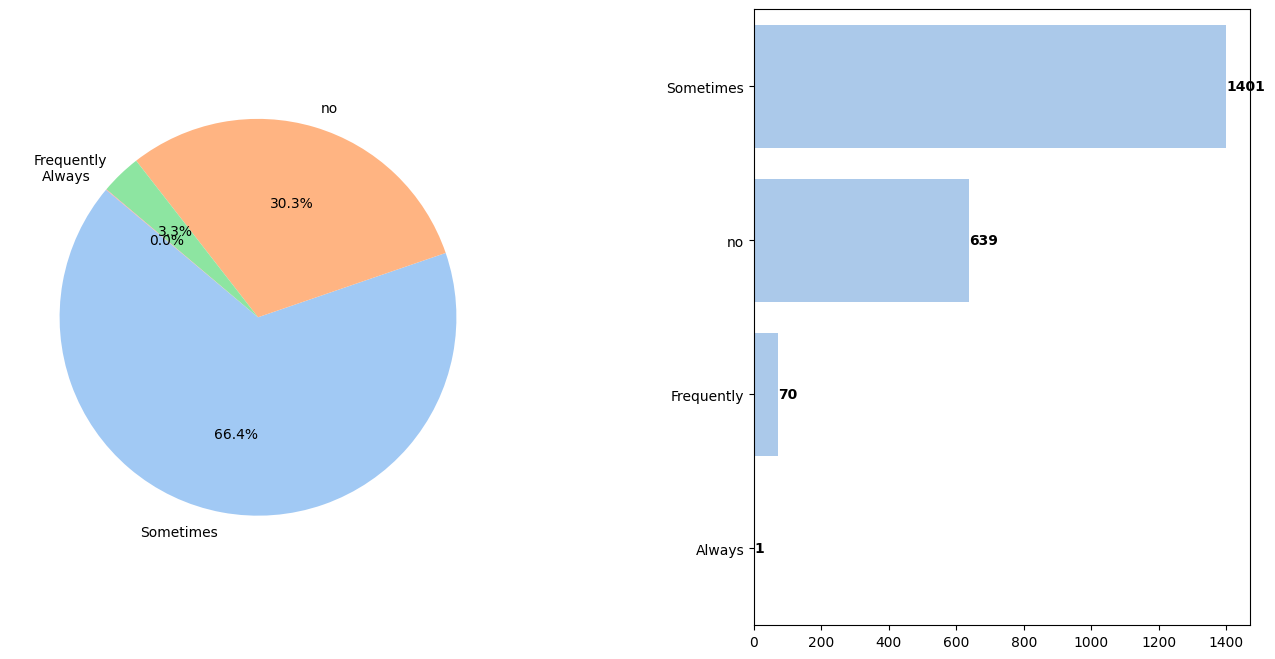

In [92]:
show_pie_chart(obesity, 'CALC')

66.6 %consumes alcohol sometimes while 3.3% does Frequent.

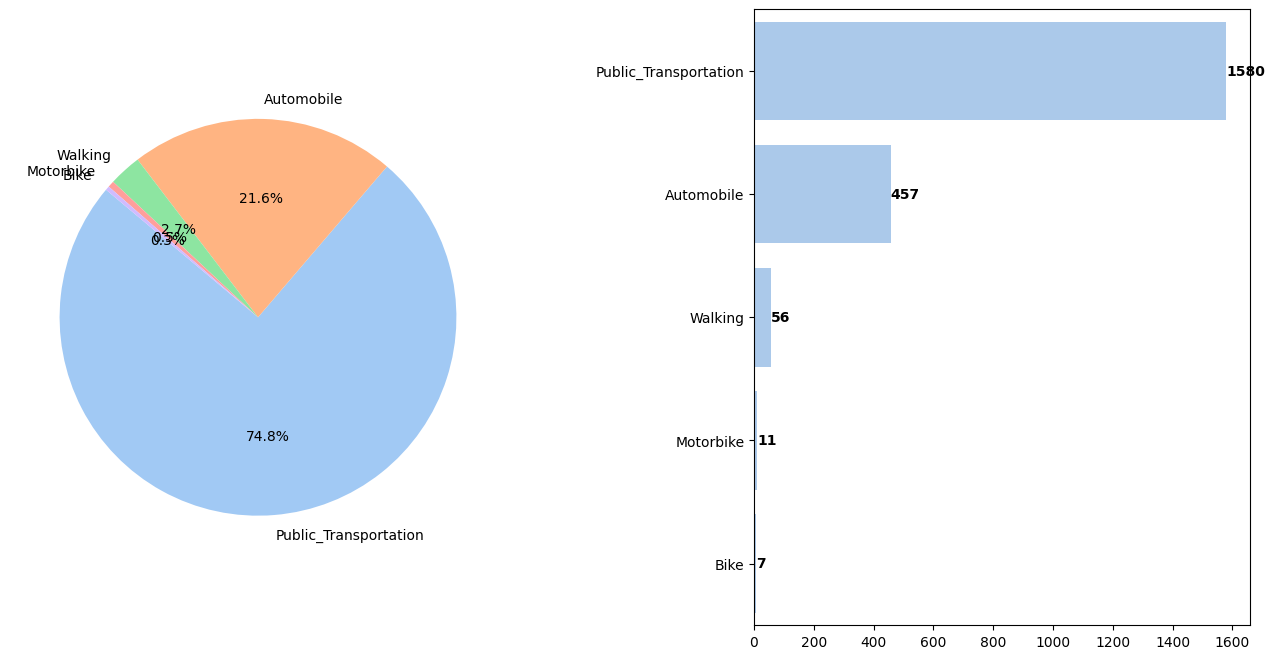

In [93]:
show_pie_chart(obesity, 'MTRANS')

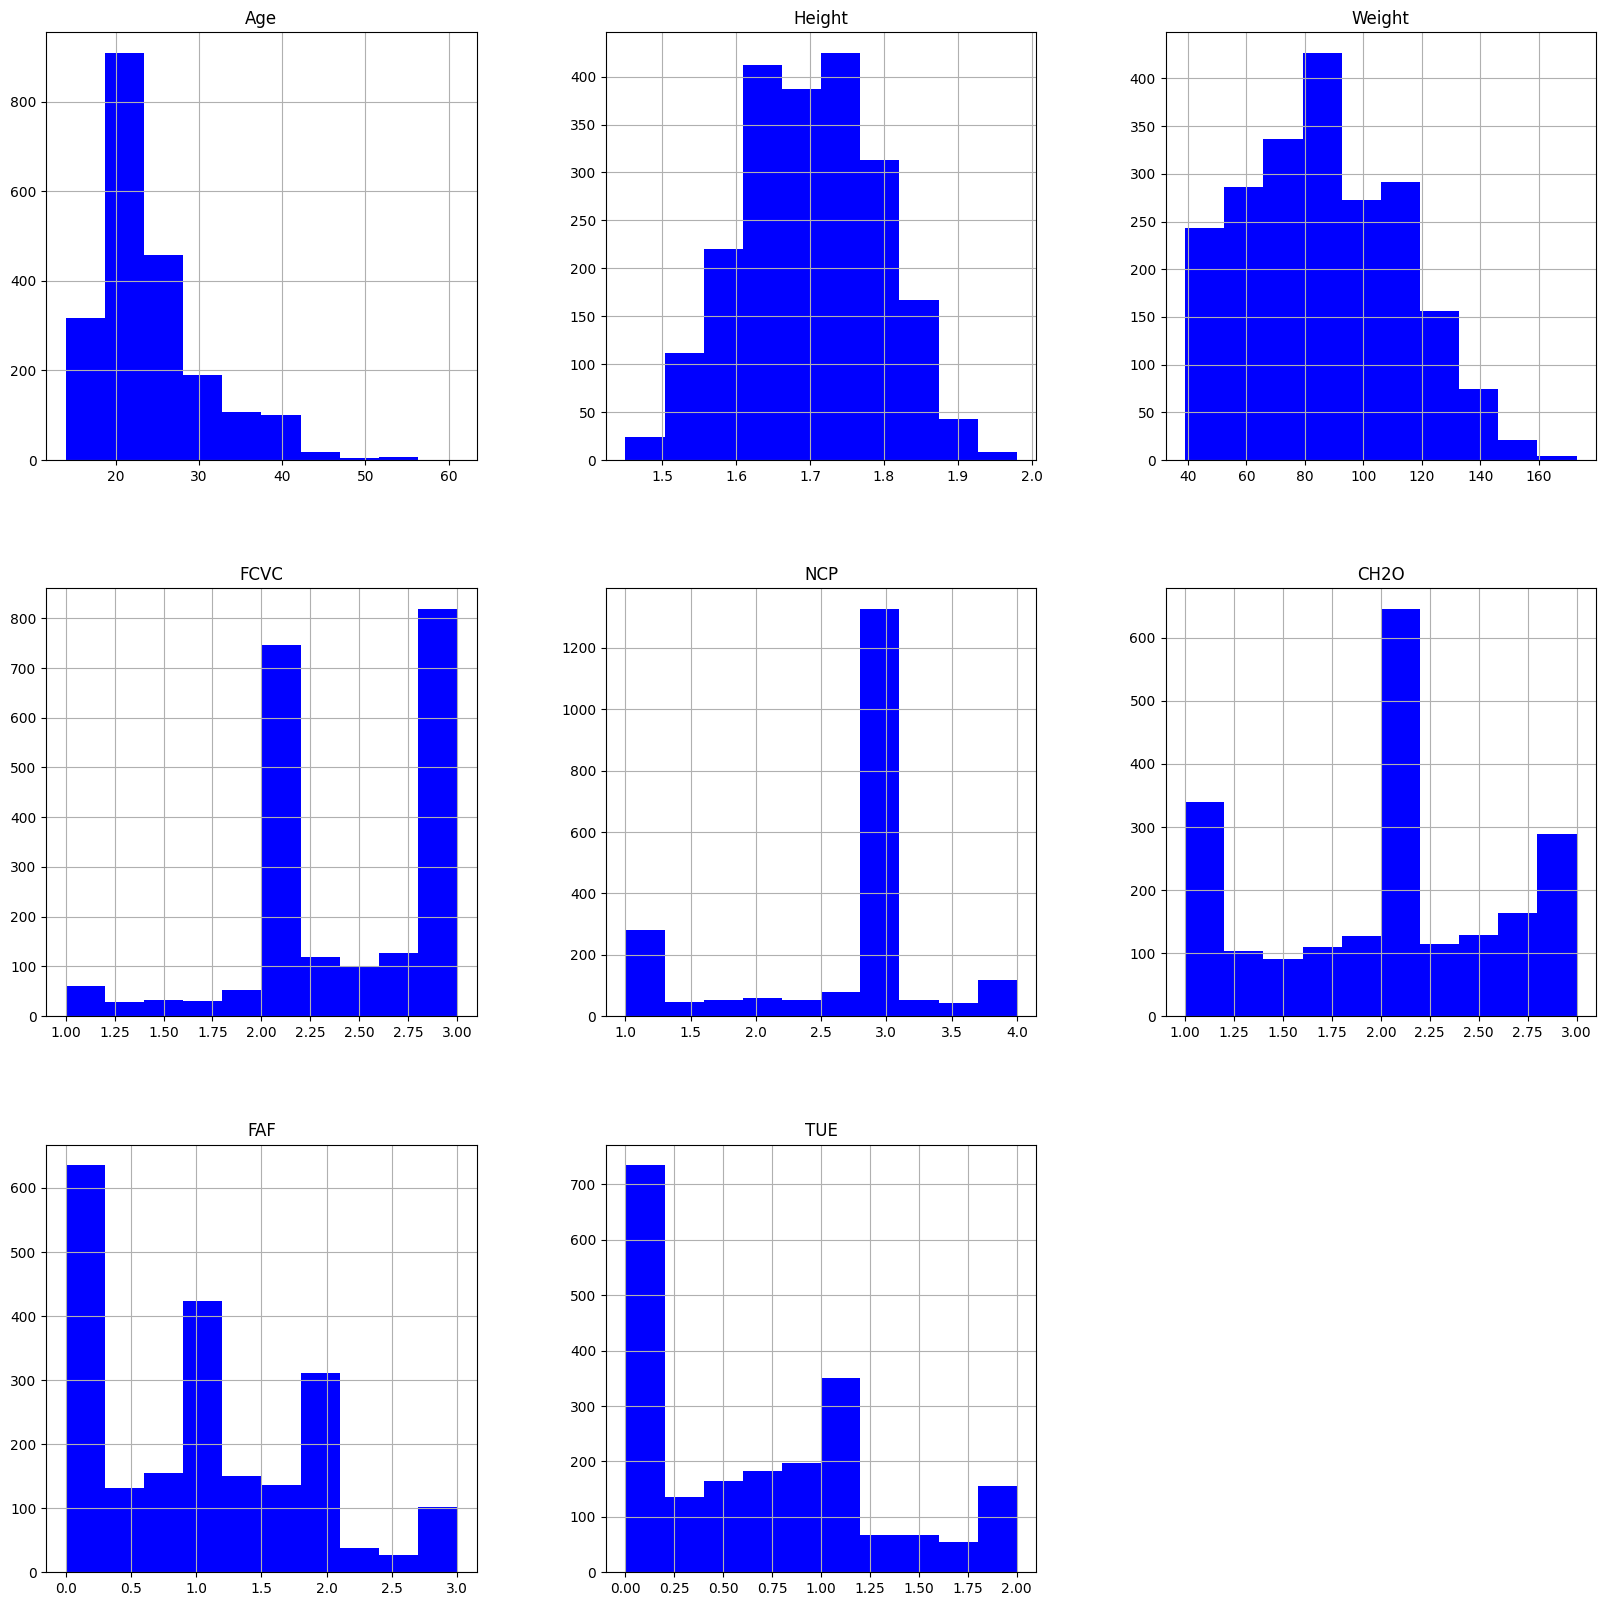

In [89]:
obesity.hist(figsize=(20,20), color = 'blue')
plt.show()